In [1]:
import pandas as pd #importing the pandas module which we will be using in this project.
import numpy as np #importing the numpy module which we will be using in this project.
import matplotlib.pyplot as plt #importing the matplotlib.pyplot module which we will be using in this project.
import seaborn as sns #importing the seaborn module which we will be using in this project.
import warnings #importing the warnings module which we will be using in this project.
from sklearn.metrics import mean_squared_error #importing the mean_squared-error sklearn.metrics module which we will be using in this project.
from scipy.stats import pearsonr #importing the scipy.stats and pearsonr module which we will be using in this project.
from sklearn.model_selection import cross_val_score, cross_val_predict #importing the cross_val_score module which we will be using in this project.
from sklearn import metrics #importing the metrics from sklearn module which we will be using in this project.
 


In [2]:
df_cotton=pd.read_csv('C:\\Users\\asus\\Downloads\\crop-yield-prediction\\dataset.csv') #reading the dataset Unprocessed Data csv file
df_cotton #printing our dataset file


,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Alabama,1964,99.0,72.0,100.0,62.0,99.0,63.0,NaN,NaN,NaN
1,Alabama,1965,100.0,81.0,100.0,63.0,100.0,66.0,NaN,NaN,NaN
2,Alabama,1966,100.0,83.0,100.0,69.0,100.0,70.0,NaN,NaN,NaN
3,Alabama,1967,100.0,78.0,100.0,71.0,100.0,73.0,NaN,NaN,NaN
4,Alabama,1968,100.0,71.0,99.0,71.0,99.0,73.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
751,Texas,2013,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,4500.0,610.0
752,Texas,2014,NaN,NaN,NaN,NaN,NaN,NaN,5650.0,5200.0,748.0
753,Texas,2015,66.0,65.0,46.0,34.0,16.0,14.0,7000.0,5500.0,809.0
754,Texas,2016,NaN,NaN,NaN,NaN,NaN,NaN,7750.0,4350.0,756.0


In [3]:
df_cotton.isna().sum() #here we are checking if any value is null or not.


State                                   0
Year                                    0
Nitrogen (%)                          288
Nitrogen (Pounds/Acre)                288
Phosphorous (%)                       288
Phosphorous (Pounds/Acre)             288
Potash (%)                            294
Potash (Pounds/Acre)                  298
Area Planted (acres)                  126
Harvested Area (acres)                126
Lint Yield (Pounds/Harvested Acre)    126
dtype: int64

In [4]:
df_cotton.groupby('State').mean() #here we are sorting our dataset according to states and printing the mean of it.

,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
State,,,,,,,,,,
Alabama,1990.5,99.032258,82.806452,92.774194,64.806452,92.903226,74.258065,419.355556,407.822222,644.688889
Arizona,1990.5,93.564103,144.410256,43.205128,60.846154,6.054054,23.411765,289.488889,287.800000,1290.288889
Arkansas,1990.5,97.139535,80.883721,72.697674,41.813953,76.348837,62.069767,733.666667,710.888889,805.911111
California,1990.5,93.975000,131.175000,35.625000,67.750000,10.236842,52.432432,751.577778,744.711111,1299.088889
Georgia,1990.5,98.441176,90.529412,95.117647,58.117647,97.000000,91.558824,865.622222,837.977778,684.311111
Louisiana,1990.5,96.325000,79.600000,62.200000,46.900000,63.875000,57.700000,532.888889,519.866667,751.666667
Mississippi,1990.5,98.953488,101.720930,44.767442,55.372093,54.790698,74.697674,978.155556,961.200000,809.400000
Missouri,1990.5,96.933333,67.300000,86.366667,43.933333,92.433333,64.200000,301.133333,290.955556,769.911111
New Mexico,1990.5,58.190476,68.190476,43.571429,61.857143,8.842105,20.210526,69.533333,60.088889,777.777778


In [5]:
df_cotton=df_cotton.fillna(df_cotton.groupby('State').transform('mean')) #here we are filling the null or empty values by mean of the column

In [6]:
df_cotton #here we are printing the dataset again to see the chnages

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Alabama,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222,644.688889
1,Alabama,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222,644.688889
2,Alabama,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222,644.688889
3,Alabama,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222,644.688889
4,Alabama,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222,644.688889
...,...,...,...,...,...,...,...,...,...,...,...
751,Texas,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000,610.000000
752,Texas,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000,748.000000
753,Texas,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000,809.000000
754,Texas,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000,756.000000


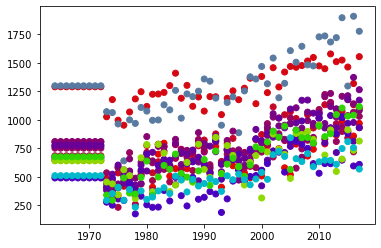

In [7]:
fig, ax = plt.subplots() #here we are plotting the subplots and plotting it
 
colors = {'Alabama':'#E50800',
          'Arizona':'#D50713',
          'Arkansas':'#C60626',
          'California':'#597AA1',
          'Georgia':'#A7044C',
          'Louisiana':'#98045F',
          'Mississippi':'#880372',
          'Missouri':'#790285',
          'New Mexico':'#690198',
          'North Carolina':'#5A00AB',
          'Oklahoma':'#4B00BF',
          'South Carolina':'#8FD900',
          'Tennessee':'#2FD500',
          'Texas':'#00B9CA'
           }    #here we are giving colors to different states so that would be easy to differentiate them
 
ax.scatter(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)'], c=df_cotton['State'].apply(lambda x: colors[x]),) #here we are suing a lambda function on our states and giving it a color that we defined in rpevious line
 
plt.show() #here we are using show function to plot the graph

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Potash (Pounds/Acre)')

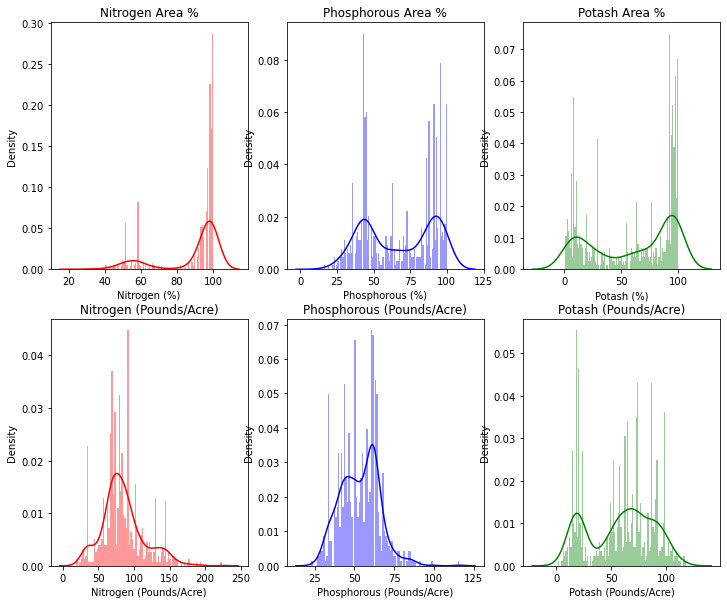

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(231) #here we are using the subplot function to plot the graph
sns.distplot(df_cotton['Nitrogen (%)'], color='r', bins=100, hist_kws={'alpha': 0.4}) #here we are printing the graph of Nitrogen gas and we are giving it a red color
plt.title('Nitrogen Area %') #here we are giving the title red to the Nitrogen Area graph
 
plt.subplot(232) #here we are using the subplot function to plot the graph
sns.distplot(df_cotton['Phosphorous (%)'], color='b', bins=100, hist_kws={'alpha': 0.4})  #here we are printing the graph of Phosphoros gas and we are giving it a blue color
plt.title('Phosphorous Area %')#here we are giving the title red to the Phosphorous Area graph
 
plt.subplot(233) #here we are using the subplot function to plot the graph
sns.distplot(df_cotton['Potash (%)'], color='g', bins=100, hist_kws={'alpha': 0.4})  #here we are printing the graph of Potash gas and we are giving it a green color
plt.title('Potash Area %')#here we are giving the title red to the Potash Area graph
 
plt.subplot(234) #here we are using the subplot function to plot the graph
sns.distplot(df_cotton['Nitrogen (Pounds/Acre)'], color='r', bins=100, hist_kws={'alpha': 0.4})  #here we are printing the graph of Nitrogen gas and we are giving it a red color
plt.title('Nitrogen (Pounds/Acre)')#here we are giving the title red to the Nitrogen Area graph
 
plt.subplot(235) #here we are using the subplot function to plot the graph
sns.distplot(df_cotton['Phosphorous (Pounds/Acre)'], color='b', bins=100, hist_kws={'alpha': 0.4})  #here we are printing the graph of Phosphorous gas and we are giving it a blue color
plt.title('Phosphorous (Pounds/Acre)')#here we are giving the title red to the Phosphorous Area graph
 
plt.subplot(236) #here we are using the subplot function to plot the graph
sns.distplot(df_cotton['Potash (Pounds/Acre)'], color='g', bins=100, hist_kws={'alpha': 0.4}) #here we are printing the graph of Potash gas and we are giving it a green color
plt.title('Potash (Pounds/Acre)')#here we are giving the title red to the Potash Area graph

Text(0.5, 0, 'State Name')

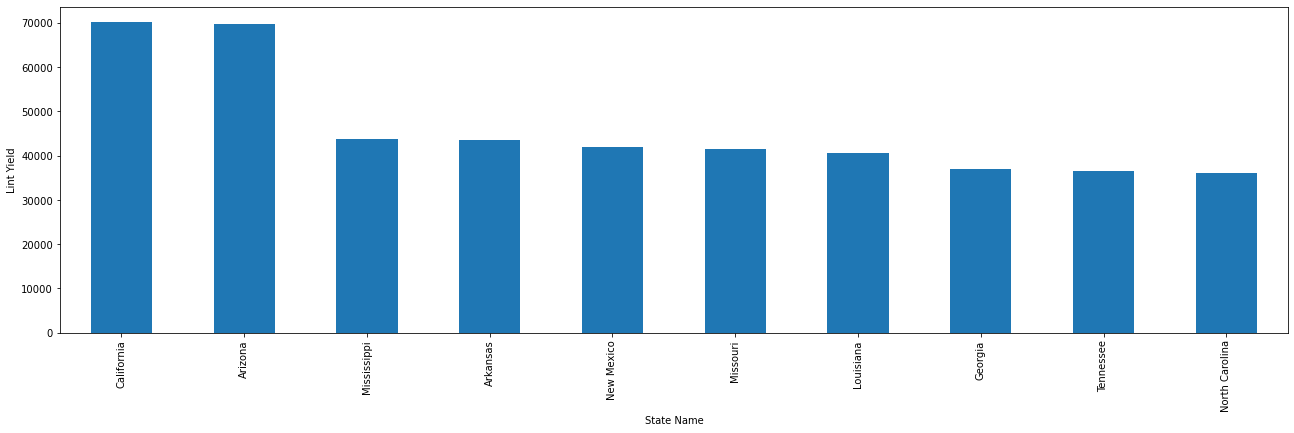

In [9]:
plt.figure(figsize=(22,6)) #here we are trying to plot bar graph between states and Lint Yield columns
GraphData=df_cotton.groupby(['State'])['Lint Yield (Pounds/Harvested Acre)'].sum().nlargest(10) #we are sorting according to states and 
GraphData.plot(kind='bar') #here we are describing that we want a bar graph
plt.ylabel('Lint Yield') #we are giving X label as Lint Yield 
plt.xlabel('State Name') #we are giving Y label as State Name


In [10]:
df_cotton['State'].unique() #here we are printing all the unique states in our dataset right now

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Georgia',
       'Louisiana', 'Mississippi', 'Missouri', 'New Mexico',
       'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

In [11]:
mapping = ({'Alabama':1,
'Arizona':2,
'Arkansas':3,
'California':4,
'Georgia':5,
'Louisiana':6,
'Mississippi':7,
'Missouri':8,
'New Mexico':9,
'North Carolina':10,
'Oklahoma':11,
'South Carolina':12,
'Tennessee':13,
'Texas':14,
           })# here we describing a mapping for all the states that is present in our dataset 
df_cotton=df_cotton.replace({'State': mapping}) #here we are replacing our States mapping with our defined mapping in our previous line


In [12]:
df_cotton #here we are prining our dataset again.

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,1,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222,644.688889
1,1,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222,644.688889
2,1,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222,644.688889
3,1,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222,644.688889
4,1,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222,644.688889
...,...,...,...,...,...,...,...,...,...,...,...
751,14,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000,610.000000
752,14,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000,748.000000
753,14,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000,809.000000
754,14,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000,756.000000


In [13]:
x=df_cotton.drop('Lint Yield (Pounds/Harvested Acre)',axis=1) #we are removing the column of Lint Yield becuase that is our output dataset and we are storing it in our output datset.
y=df_cotton['Lint Yield (Pounds/Harvested Acre)'] #storing our output dataset in a new variable called y
 
x #here we are printing x and checking our output


,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres)
0,1,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222
1,1,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222
2,1,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222
3,1,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222
4,1,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222
...,...,...,...,...,...,...,...,...,...,...
751,14,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000
752,14,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000
753,14,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000
754,14,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000


In [14]:
y #here we are printing our y dataset.

0      644.688889
1      644.688889
2      644.688889
3      644.688889
4      644.688889
          ...    
751    610.000000
752    748.000000
753    809.000000
754    756.000000
755    568.000000
Name: Lint Yield (Pounds/Harvested Acre), Length: 756, dtype: float64

In [15]:
cor1, _ = pearsonr(df_cotton['State'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print('%.3f' % cor1) #printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print('%.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Nitrogen (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print('%.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Nitrogen (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print('%.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Phosphorous (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print(' %.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Phosphorous (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print('%.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Potash (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print('%.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Potash (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print(' %.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Area Planted (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation#using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print(' %.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton
 
cor1, _ = pearsonr(df_cotton['Harvested Area (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) #using the pearsonr method on the State and the Lint Yield column in our datset and we are doing it to find the correlation
print('%.3f' % cor1)#printing the state and Lint Yield pearsonr correlation vlaue using the print funciton


-0.463
0.389
0.261
0.669
 -0.319
0.309
-0.351
 -0.084
 -0.233
-0.226


In [16]:
#No need to drop any columns since the Pearson Correlations are upwards 0.2 (medium relations)
from sklearn.model_selection import train_test_split #importing the train_test_split model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% for Training and 20% for Testing
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape) #printing the shapes of the X_train and Y_train and also we are printing the Y_test shapes
 
from sklearn import ensemble #importing the ensemble module from sklearn 
yield_predict = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls') #importing the Gradient Boosting Regressor from the ensemble and passing the the values like leraning rate and loss and max depth =5 and min_sample_split = 2
 
yield_predict.fit(x_train, y_train) #passing the x and y training dataset and fitting it into the model.
 
yield_predict_test=yield_predict.predict(x_test) #using the model and passing the XTest value to get the testing dataset
yield_predict_train=yield_predict.predict(x_train)#using the model and passing the XTest value to get the testing dataset
pd.DataFrame({'actual unseen data':y_train,'predicted unseen data':yield_predict_train}) #making the dataframe from the actual and the predicted data of y_train and yield_predicted


(604, 10) (152, 10) (604,) (152,)


,actual unseen data,predicted unseen data
684,741.000000,713.615754
358,642.000000,678.520457
617,626.000000,595.208427
0,644.688889,656.560873
210,1684.000000,1698.081125
...,...,...
212,1897.000000,1863.939543
521,832.000000,791.048003
149,1071.000000,1004.801624
390,496.000000,462.525305


In [17]:
scores = cross_val_score(yield_predict, x_test, y_test, cv=5)#printing the cross validation score of the predicted value against the testing value
scores#printing the  score calcualted in the previous step
 
predictions = cross_val_predict(yield_predict, x_test, y_test, cv=5) #printing the cross validation score of the predicted value against the testing value
accuracy = metrics.r2_score(y_test, predictions) #checking the accuracy score by taking the R2 score of the actual and the predicted value
accuracy#printing the accuracy score calcualted in the previous step


0.8163158885765687

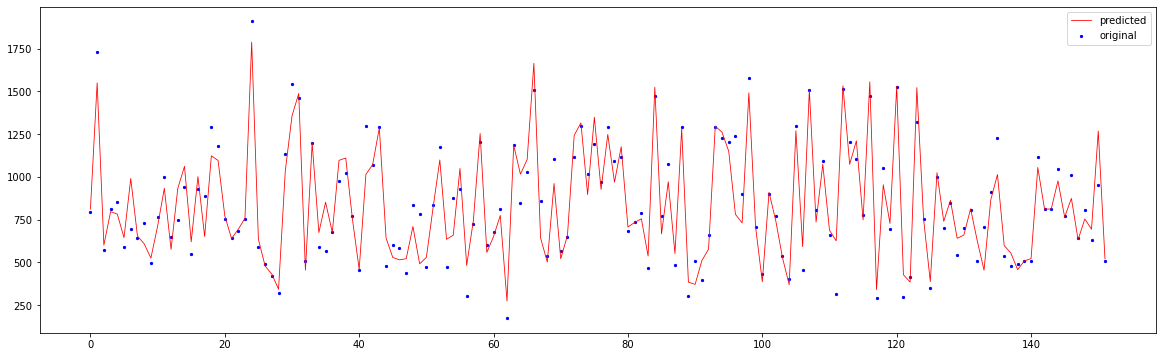

In [18]:
x_ax = range(len(y_test)) #here we are taking the length of the y_test dataset
plt.figure(figsize=(20,6)) #defining the size of the plot figure which is 26 6
plt.scatter(x_ax, y_test, s=5, color="blue", label="original") #defining the attributes of the plot scatter that color should be blue
plt.plot(x_ax, yield_predict_test, lw=0.8, color="red", label="predicted") #passing the x and the y values to the plot function to actually plot the graph and giving it red color to it.
plt.legend() #plotting the legend
plt.show() #plotting the show and using the show function

In [20]:
print('MAE= ',metrics.mean_absolute_error(y_test,yield_predict_test)) #here we are taking the y_test dataset and Yield_prediction data and then we are printing the mean absolute error of the predicted and the actual value.
print('MSE= ',metrics.mean_squared_error(y_test,yield_predict_test)) #here we are taking the y_test dataset and Yield_prediction data and then we are printing the mean squared error of the predicted and the actual value.
print('R2 value= ',yield_predict.score(x_test,y_test)) #here we are taking the y_test dataset and Yield_prediction data and then we are printing the R2 error of the predicted and the actual value.
print('Adjusted R2 value= ',1 - (1 - (yield_predict.score(x_test,y_test))) * ((756 - 1)/(756-10-1))) #here we are taking the y_test dataset and Yield_prediction data and then we are printing the adjusted R2 error of the predicted and the actual value.
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,yield_predict_train))) #here we are taking the y_test dataset and Yield_prediction data and then we are printing the root mean squared error of the predicted and the actual value.
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,yield_predict_test))) #here we are taking the y_test dataset and Yield_prediction data and then we are printing the root mean squared error of the predicted and the actual value.


MAE=  76.40724381310014
MSE=  11194.107341586017
R2 value=  0.8783616177082516
Adjusted R2 value=  0.876728887744604
RMSE (train)=  39.46445050496039
RMSE (test)=  105.80220858557735


In [21]:
df_cotton['Lint Yield (Pounds/Harvested Acre)'].max() - df_cotton['Lint Yield (Pounds/Harvested Acre)'].min() #here we are taking the maximum value of LInt Yield column and then we are tkaing the minimum value of Lint Yield column and printing the difference of it.

1736.0